# MEEP  Example: a prism
Author: Joel W. Ager (jwager@lbl.gov), [Group website](http://ager.mse.berkeley.edu), [github](https://github.com/joelager)  

Code sourced from a repository maintained by [Antoine Wojdyla](https://github.com/awojdyla).   

Translated from Scheme to Python API by JWA. 

# Import

In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

# Prism code

-----------
Initializing structure...
time for choose_chunkdivision = 0.000524998 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 80
     block, center = (2,2,0)
          size (10,10,0)
          axes (0.994522,0.104528,0), (0,-1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.63,11.63,11.63)
     block, center = (2,7,0)
          size (14.87,10,0)
          axes (0.669131,-0.743145,0), (0,-1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 3.26728 s
-----------
on time step 314 (time=1.9625), 0.0127635 s/step
on time step 609 (time=3.80625), 0.013596 s/step
Meep progress: 4.7562500000000005/40.0 = 11.9% done in 10.0s, 74.2s to go
on time step 909 (time=5.68125), 0.0133497 s/step
on time step 1202 (time=7.5125), 0.0136739 s/step
Meep progress: 9.21875/40.0 = 23.0% done in 20.0s, 66.8s to go
on time step 1476 (time=9.225), 0.0146016 s/step
on time step 1754 (time=10.9625), 0.0143966 s/step
on time

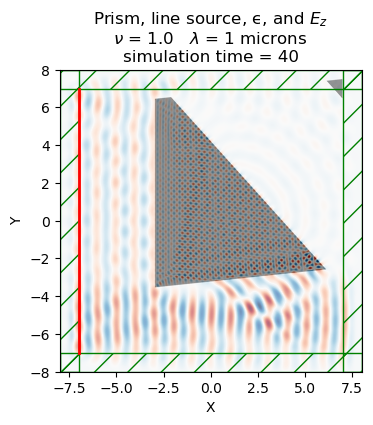

In [2]:
theta =  48
lambda0 = 1

w0 = lambda0/np.pi
th_1 = theta*(np.pi/180)    # convert 48 degrees to radians
th_2 = th_1*2 - np.pi/2.    # 6 degrees

cell_size = mp.Vector3(16, 16 , 0)   # 2D domain, 16 x 16 microns
resolution = 80                      # pixels/μm 
pml_layers = [mp.PML(1.0)]           # 1 micron of PML all around

geometry = [mp.Block(material=mp.Medium(epsilon=11.63),
                     center=mp.Vector3(x=2, y=2),
                     e1=mp.Vector3(np.cos(th_2), np.sin(th_2),0),
                     e2=mp.Vector3(0, -1, 0),
                     e3=mp.Vector3(0, 0, 1),
                     size=mp.Vector3(10,10)),
            mp.Block(material=mp.Medium(epsilon=1),
                     center=mp.Vector3(x=2, y=7),
                     e1=mp.Vector3(np.cos(th_1), -np.sin(th_1), 0),
                     e2=mp.Vector3(0, -1, 0),
                     e3=mp.Vector3(0, 0, 1),
                     size=mp.Vector3(14.87, 10))]

src_pt_1 = mp.Vector3(x=-7, y=0.0)           # simple for now, can do the custom source later

sources = [mp.Source(mp.ContinuousSource(frequency=1/lambda0),
                     component=mp.Ez,
                     amplitude=1.0,
                     center=src_pt_1,
                     size=mp.Vector3(y=14))] # This one extends across the whole LH side of the box

sim = mp.Simulation(cell_size=cell_size,
                    sources=sources,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    resolution=resolution)
# Check geometry
"""
plt.figure(dpi=100)
sim.plot2D()
plt.show()
"""

# Run simulation
t_sim = 40
mp.quiet(quietval=False)             # quiet or not
sim.progress_interval = 10           # stdin reporting, default is 4 seconds
sim.run(until=t_sim)                 # Optionally, can add saving snapshots to h5 files here

# Visualization at end of simulation
plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.title(
    'Prism, line source, ϵ, and $E_z$\n'
    '$\\nu$ = {}   $\\lambda$ = {} microns \n'
    'simulation time = {}'.format(1/lambda0, lambda0, t_sim)
)
plt.show()

# Original Scheme code